<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [23]:
# Import torch
import torch
from conda.notices.core import retrieve_notices

# Setup device agnostic code
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"


# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [24]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

N_SAMPLES = 1000

torch.manual_seed(42)

X, y = make_moons(n_samples=N_SAMPLES, shuffle=True)

X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [25]:
# Turn data into a DataFrame
import pandas as pd

X_df = pd.DataFrame(X.numpy())
y_df = pd.DataFrame(y.numpy())


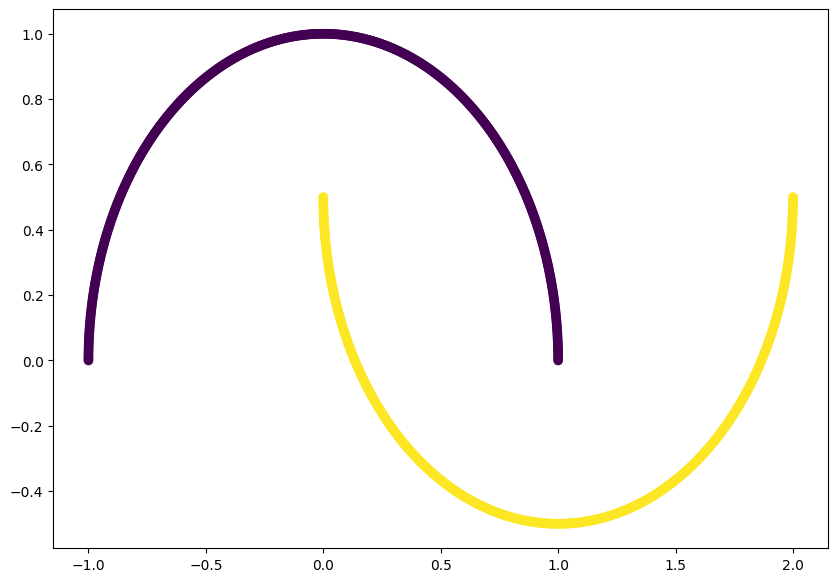

In [26]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [27]:
# Turn data into tensors of dtype float


# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [111]:
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim),
        )

    def forward(self, x):
        ## Your code here ##
        logits = self.linear_layer_stack(x)
        return logits

# Instantiate the model
## Your code here ##

model_0 = MoonModelV0(2, 1).to(device)
model_0

MoonModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [118]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [119]:
# What's coming out of our model?
model_0.to(device)

logits = model_0(X[:10].to(device))
probs = torch.sigmoid(logits)
pred = torch.round(probs)
# logits (raw outputs of model)
print("Logits:", logits)
## Your code here ##

# Prediction probabilities
print("Pred probs:", probs)
## Your code here ##

# Prediction labels
print("Pred labels:", pred)
## Your code here ##

Logits: tensor([[-0.0198],
        [-0.2780],
        [-0.1664],
        [-0.1475],
        [-0.3150],
        [-0.2467],
        [-0.1685],
        [-0.3370],
        [-0.1459],
        [ 0.0007]], device='mps:0', grad_fn=<LinearBackward0>)
Pred probs: tensor([[0.4950],
        [0.4309],
        [0.4585],
        [0.4632],
        [0.4219],
        [0.4386],
        [0.4580],
        [0.4165],
        [0.4636],
        [0.5002]], device='mps:0', grad_fn=<SigmoidBackward0>)
Pred labels: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='mps:0', grad_fn=<RoundBackward0>)


In [120]:
# Let's calculate the accuracy using accuracy from TorchMetrics
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
# acc_fn

In [121]:
torch.manual_seed(RANDOM_SEED)

model_0.to(device)

# Setup epochs

epochs = 1000

# Send data to the device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train)

    loss = loss_fn(y_logits.view(-1), y_train)

    y_probs = torch.sigmoid(y_logits)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred = torch.round(y_probs.view(-1))
    # Calculate the accuracy
    acc = acc_fn(y_pred, y_train) # the accuracy function needs to compare pred labels (not logits) with actual labels

    ### Testing
    model_0.eval()
    with torch.inference_mode():

        test_logits = model_0(X_test)
        test_prob = torch.sigmoid(test_logits)

        test_loss = loss_fn(test_logits.view(-1), y_test)

        test_pred = torch.round(test_prob.view(-1))

        test_acc = acc_fn(test_pred, y_test)

    # Print out what's happening every 100 epochs
        if (epoch + 1) % 100 == 0:
            print("Epoch: {:04d}/{:04d}".format(epoch + 1, epochs), "Loss: {:.4f} Acc: {:.4f}".format(loss.item(), acc*100), "Test Loss: {:.4f} Acc: {:.4f}".format(test_loss.item(), test_acc * 100), flush=True)
    

Epoch: 0100/1000 Loss: 0.0217 Acc: 100.0000 Test Loss: 0.0175 Acc: 100.0000
Epoch: 0200/1000 Loss: 0.0015 Acc: 100.0000 Test Loss: 0.0012 Acc: 100.0000
Epoch: 0300/1000 Loss: 0.0006 Acc: 100.0000 Test Loss: 0.0005 Acc: 100.0000
Epoch: 0400/1000 Loss: 0.0003 Acc: 100.0000 Test Loss: 0.0003 Acc: 100.0000
Epoch: 0500/1000 Loss: 0.0002 Acc: 100.0000 Test Loss: 0.0002 Acc: 100.0000
Epoch: 0600/1000 Loss: 0.0001 Acc: 100.0000 Test Loss: 0.0001 Acc: 100.0000
Epoch: 0700/1000 Loss: 0.0001 Acc: 100.0000 Test Loss: 0.0000 Acc: 100.0000
Epoch: 0800/1000 Loss: 0.0000 Acc: 100.0000 Test Loss: 0.0000 Acc: 100.0000
Epoch: 0900/1000 Loss: 0.0000 Acc: 100.0000 Test Loss: 0.0000 Acc: 100.0000
Epoch: 1000/1000 Loss: 0.0000 Acc: 100.0000 Test Loss: 0.0000 Acc: 100.0000


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [122]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    print(X.shape, y.shape)

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary


    print(y_pred.shape)
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

torch.Size([200, 2]) torch.Size([200])
torch.Size([10201, 1])


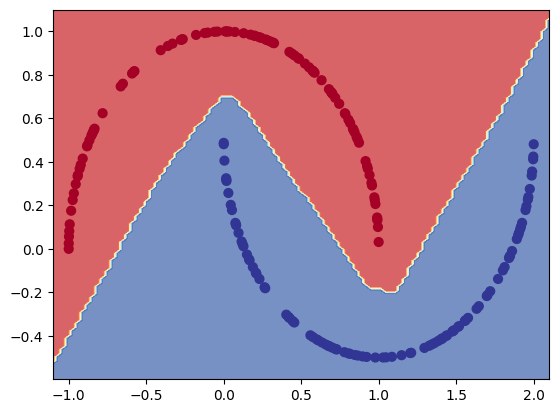

In [123]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [133]:
# Create a straight line tensor
line = torch.from_numpy(np.linspace(-5, 5, 20))

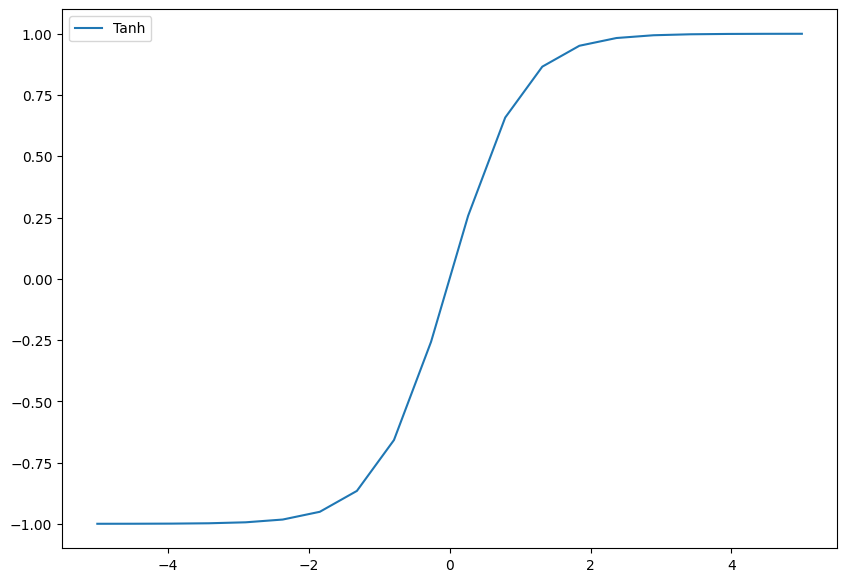

In [135]:
# Test torch.tanh() on the tensor and plot it
linh = torch.tanh(line)

plt.figure(figsize=(10, 7))
plt.plot(line, linh, label="Tanh")
plt.legend()


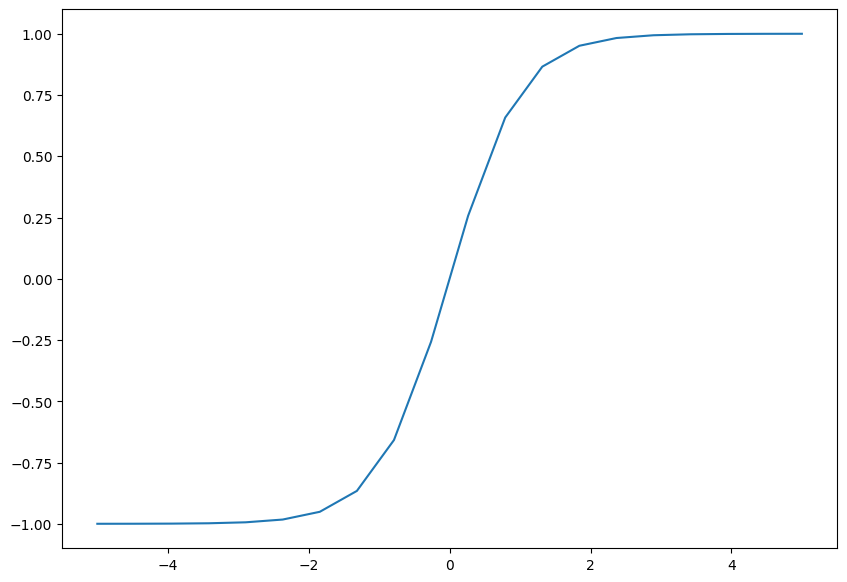

In [137]:
# Replicate torch.tanh() and plot it
linh_custom = (torch.exp(line) - torch.exp(-line)) / (torch.exp(line) + torch.exp(-line))
plt.figure(figsize=(10, 7))
plt.plot(line, linh_custom, label="Tanh")


## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

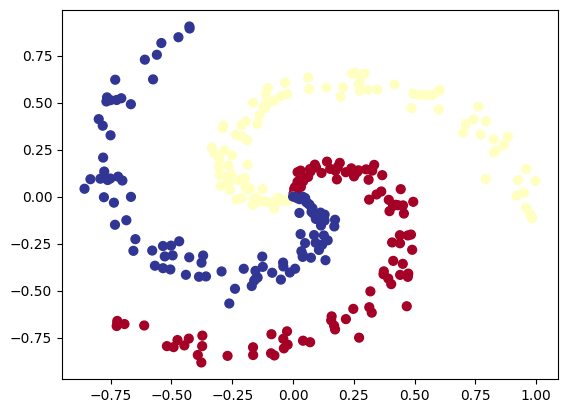

In [138]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [139]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)


(240, 60, 240, 60)

In [145]:
print(X_train.shape, y_train.shape)

torch.Size([240, 2]) torch.Size([240])


In [148]:
# Let's calculate the accuracy for when we fit our model

acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)
acc_fn

MulticlassAccuracy()

In [144]:
# Prepare device agnostic code

if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

# device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module

class SpiralModule(torch.nn.Module):

    def __init__(self, input_features, output_classes):

        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, output_classes)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Instantiate model and send it to device

spiral_model = SpiralModule(2, 3)
spiral_model.to(device)
spiral_model


SpiralModule(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [146]:
# Setup data to be device agnostic
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Print out first 10 untrained model outputs (forward pass)

logits = spiral_model(X_train[:10])
probs = torch.sigmoid(logits)
labels = torch.argmax(logits, dim=1)

print("Logits:", logits)
## Your code here ##

print("Pred probs:", probs)
## Your code here ##

print("Pred labels:", labels)
## Your code here ##

Logits: tensor([[-0.1118, -0.0336, -0.0213],
        [-0.1246, -0.0521, -0.0213],
        [-0.1224,  0.0068, -0.0378],
        [-0.1091, -0.0355, -0.0248],
        [-0.0692, -0.0137, -0.0016],
        [-0.2115, -0.0273, -0.0266],
        [-0.0644, -0.0092, -0.0243],
        [-0.0489,  0.0282, -0.0229],
        [-0.1765, -0.0748,  0.0082],
        [-0.1555, -0.0126, -0.0296]], device='mps:0',
       grad_fn=<LinearBackward0>)
Pred probs: tensor([[0.4721, 0.4916, 0.4947],
        [0.4689, 0.4870, 0.4947],
        [0.4694, 0.5017, 0.4905],
        [0.4727, 0.4911, 0.4938],
        [0.4827, 0.4966, 0.4996],
        [0.4473, 0.4932, 0.4933],
        [0.4839, 0.4977, 0.4939],
        [0.4878, 0.5070, 0.4943],
        [0.4560, 0.4813, 0.5020],
        [0.4612, 0.4969, 0.4926]], device='mps:0', grad_fn=<SigmoidBackward0>)
Pred labels: tensor([2, 2, 1, 2, 2, 2, 1, 1, 2, 1], device='mps:0')


In [147]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(spiral_model.parameters(), lr=0.001)

In [150]:
# Build a training loop for the model

# Loop over data

epochs = 1000


for epoch in range(epochs):
    spiral_model.train()

    logits = spiral_model(X_train)

    loss = loss_fn(logits, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    probs = torch.sigmoid(logits)
    labels = torch.argmax(logits, dim=1)


    acc = acc_fn(labels, y_train)

    spiral_model.eval()
    with torch.inference_mode():

        test_logits = spiral_model(X_test)
        test_loss = loss_fn(test_logits, y_test)

        test_prob = torch.sigmoid(test_logits)
        test_pred = torch.argmax(test_prob, dim=1)

        test_acc = acc_fn(test_pred, y_test)

    if (epoch + 1) % 100 == 0:
        print("Epoch: {:04d}/{:04d}".format(epoch + 1, epochs), "Loss: {:.4f} Acc: {:.4f}".format(loss.item(), acc*100), "Test Loss: {:.4f} Acc: {:.4f}"
        .format(test_loss.item(), test_acc * 100), flush=True)


  ## Training
  
  # 1. Forward pass
  

  # 2. Calculate the loss
  
  
  # 3. Optimizer zero grad
  

  # 4. Loss backward
  

  # 5. Optimizer step
  

  ## Testing
  

    # 1. Forward pass
    
    # 2. Caculate loss and acc
    
  # Print out what's happening every 100 epochs
  

Epoch: 0100/1000 Loss: 0.8546 Acc: 59.1667 Test Loss: 0.9039 Acc: 46.6667
Epoch: 0200/1000 Loss: 0.6014 Acc: 65.8333 Test Loss: 0.6608 Acc: 61.6667
Epoch: 0300/1000 Loss: 0.4469 Acc: 77.0833 Test Loss: 0.5104 Acc: 68.3333
Epoch: 0400/1000 Loss: 0.3189 Acc: 86.6667 Test Loss: 0.3940 Acc: 76.6667
Epoch: 0500/1000 Loss: 0.2278 Acc: 92.9167 Test Loss: 0.3058 Acc: 88.3333
Epoch: 0600/1000 Loss: 0.1672 Acc: 96.6667 Test Loss: 0.2383 Acc: 91.6667
Epoch: 0700/1000 Loss: 0.1252 Acc: 97.5000 Test Loss: 0.1896 Acc: 95.0000
Epoch: 0800/1000 Loss: 0.0980 Acc: 97.9167 Test Loss: 0.1559 Acc: 98.3333
Epoch: 0900/1000 Loss: 0.0793 Acc: 98.3333 Test Loss: 0.1303 Acc: 98.3333
Epoch: 1000/1000 Loss: 0.0675 Acc: 98.3333 Test Loss: 0.1127 Acc: 98.3333


torch.Size([60, 2]) torch.Size([60])
torch.Size([10201])


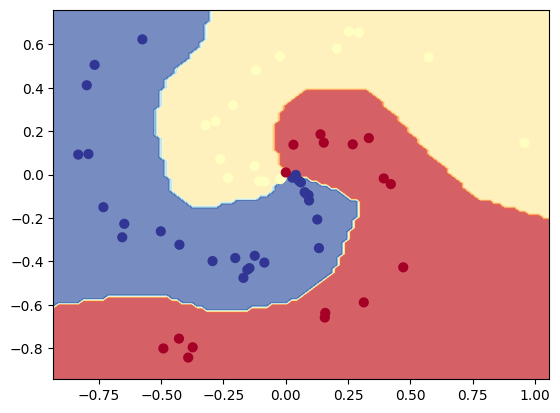

In [152]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(spiral_model, X_test, y_test)